<a href="https://colab.research.google.com/github/shashankv05/Colab_Notebooks/blob/main/Womens_Clothing_E_Commerce_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Shashank Python V/Projects/DataSet/Womens-Clothing-E-Commerce-Reviews/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0', 'Title'], inplace=True)

In [ ]:
df[df['Review Text'].isnull()]             # Rows for which Review Text is NaN, We don't need such Rows

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,5,1,0,General Petite,Dresses,Dresses


In [ ]:
df = df[~df['Review Text'].isnull()]     #Rows for which Review Text is not NaN,

**Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.** You can know more here: https://textblob.readthedocs.io/en/dev/

In [ ]:
from textblob import TextBlob
import re

In [ ]:
df['Review Text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

0        Absolutely wonderful   silky and sexy and comf...
1        Love this dress   it s sooo pretty   i happene...
2        I had such high hopes for this dress and reall...
3        I love  love  love this jumpsuit  it s fun  fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes  soft  stre...
23483    This fit well  but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22641, dtype: object

In [ ]:
df[df['Review Text'].str.contains('&amp')].head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
267,984,28,Love the look and quality of this jacket. i&am...,4,1,0,General Petite,Jackets,Jackets
503,948,40,"Is not a place i want to be, even if the style...",2,1,0,General Petite,Tops,Sweaters
2506,1078,42,Very comfortable to wear. you can wear it any ...,5,1,0,General Petite,Dresses,Dresses
2676,1131,38,This coat is super cute and flattering. i am 5...,5,1,0,General Petite,Jackets,Outerwear
4069,1147,39,This gorgeous &amp;amp;amp; beautiful dress is...,3,1,0,General,Trend,Trend


In [ ]:
df['Review Text'].str.replace('()', '')[267]

'Love the look and quality of this jacket. i&amp;#39;d say it fits true to size but it is way too short for me (i&amp;#39;m just under 6&amp;#39; tall). wish these came in tall sizes!'

In [ ]:
df['Review Text'].str.replace('(&amp)', '')[267]

'Love the look and quality of this jacket. i;#39;d say it fits true to size but it is way too short for me (i;#39;m just under 6;#39; tall). wish these came in tall sizes!'

In [ ]:
df['Review Text'].str.replace('(&gt)', '')[267]

'Love the look and quality of this jacket. i&amp;#39;d say it fits true to size but it is way too short for me (i&amp;#39;m just under 6&amp;#39; tall). wish these came in tall sizes!'

In [ ]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("()", "")
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ') 
    return ReviewText

In [ ]:
# def preprocess(ReviewText):
#   ReviewText = ReviewText.apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
#   ReviewText = ReviewText.apply(lambda x: x.lower().split())
#   ReviewText = ReviewText.apply(lambda x: ' '.join(x))
#   return ReviewText

In [ ]:
df['Review Text'] = preprocess(df['Review Text'])

In [ ]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [ ]:
df['polarity'] = df['Review Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Or, 
# df['polarity'] = df['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)   

In [ ]:
df.polarity = df.polarity.round(2)

In [ ]:
df.polarity

0        0.63
1        0.34
2        0.07
3        0.55
4        0.51
         ... 
23481    0.55
23482    0.09
23483    0.41
23484    0.32
23485    0.41
Name: polarity, Length: 22641, dtype: float64

In [ ]:
df['Review Text'].dtype   # 'O'

dtype('O')

In [ ]:
df['Review Length'] = df['Review Text'].apply(len)

In [ ]:
df['Review Length']

0         53
1        303
2        500
3        124
4        192
        ... 
23481    131
23482    223
23483    208
23484    427
23485    110
Name: Review Length, Length: 22641, dtype: int64

In [ ]:
df['Word_Count'] =  df['Review Text'].apply(lambda text: len(text.split()))

In [ ]:
(df.polarity == 0).sum()

227

In [ ]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,Review Length,Word_Count
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.63,53,8
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.34,303,62
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.07,500,98
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.55,124,22
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.51,192,36


In [ ]:
print('5 Random Reviews with the Highest Positive Sentiment Polarity: \n')
# df.loc[df.polarity == 1, ['Review Text']].sample(5)
# df.loc[df.polarity == 1, ['Review Text']].sample(5).values
for review in df.loc[df.polarity == 1, ['Review Text']].sample(5).values:
  print(review[0])

5 Random Reviews with the Highest Positive Sentiment Polarity: 

Well made & lined. great find for the fall!
So beautiful! i got the xs and it fits tts! it goes with everything! perfect weekend addition!
Perfect for lunch with the girls, pta, or saturdays with the family. this skirt is a perfect addition to your fall wardrobe.
This is a wonderful style.
For a now feel, that comfy and well made, this was a great choice!


In [ ]:
print('5 Random Reviews with the Neutral Sentiment or Zero Polarity: \n')
# df.loc[df.polarity == 0, ['Review Text']].sample(5)
# df.loc[df.polarity == 0, ['Review Text']].sample(5).values
for review in df.loc[df.polarity == 0, ['Review Text']].sample(5).values:
  print(review[0])

5 Random Reviews with the Neutral Sentiment or Zero Polarity: 

This is a fun, cozy sweater. i feel you can dress it up and use it casual too. i bought the ivory in size s, i'm 5'2''. although i put it runs true to size, it's is a tad tight around my upper arms, not uncomfortable. i have normal to somewhat skinny arms, so i don't think it was my body type. i didn't check other sweaters in the same size to see if it was an isolated case. it is to be worn loose, it has quite a bit of material all around mid to lower part, just fyi.
This was so ridiculous on me. i'm 5'8" 120 usually a 2/xs. so i ordered the xs. the inseam of the shorts are so short they barely cover my bum. and i mean barely. the romper itself was so wide that two of me could have fit in it.  love the colors, fabric, and the non-elasticized waist. if you are under 5'5" this might work for you in non-petite sizing.
Wonderful sweater and fashionable for autumn. the only thing i do not like about the sweater is that it sheds

In [ ]:
max(df.polarity), min(df.polarity)

(1.0, -0.98)

In [ ]:
print('Random Reviews with the Negative Sentiment Polarity: \n')
# df.loc[df.polarity == 1, ['Review Text']].sample(5)
# df.loc[df.polarity == 1, ['Review Text']].sample(5).values
for review in df.loc[df.polarity == -0.98, ['Review Text']].sample(2).values:
  print(review[0])

Random Reviews with the Negative Sentiment Polarity: 

Cut out design, no seems or hems.
 very disappointed in retailer
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse


**Univariate visualization with Plotly**

Single-variable or univariate visualization is the simplest type of visualization which consists of observations on only a single characteristic or attribute. Univariate visualization includes histogram, bar plots and line charts.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# df[((df.polarity > 0.00) & (df.polarity < 0.25))].polarity.unique()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

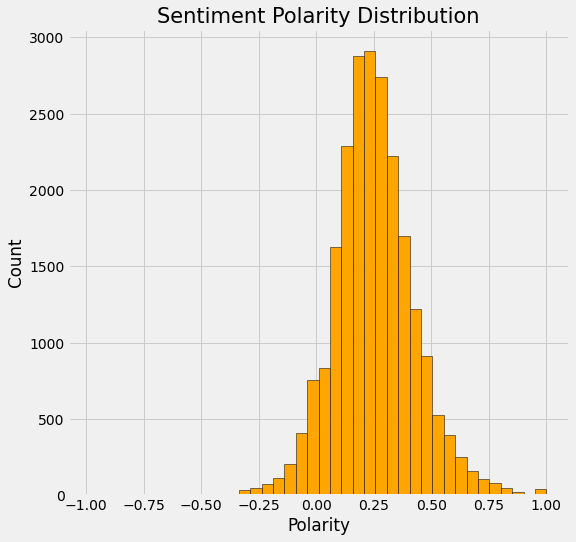

In [ ]:
plt.figure(figsize=(8, 8))
df.polarity.plot(kind='hist', bins=40, edgecolor='black', color='orange')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution', fontsize = 21)


In [ ]:
# (df.Rating == 5).sum()

Text(0.5, 1.0, 'Rating Distribution')

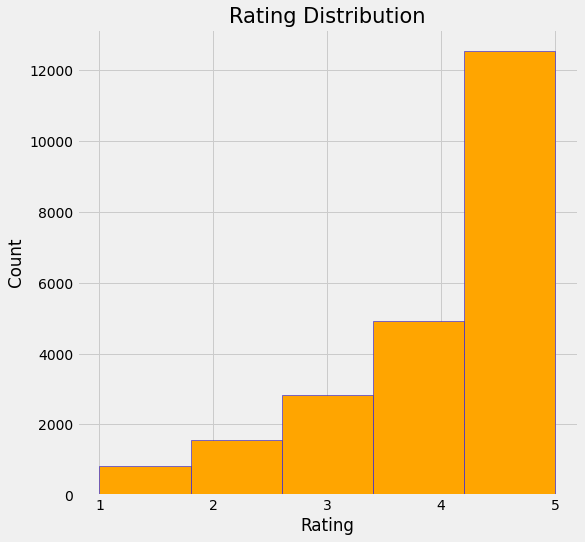

In [ ]:
plt.figure(figsize=(8, 8))
# df.Rating.value_counts()
df.Rating.plot(kind='hist', bins=5, edgecolor='b', color='orange')
plt.xticks(range(1, 6))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution', fontsize = 21)

In [ ]:
# ((df.Age > 20) & (df.Age < 30)).sum()

Text(0.5, 1.0, "Reviewer's Age Distribution")

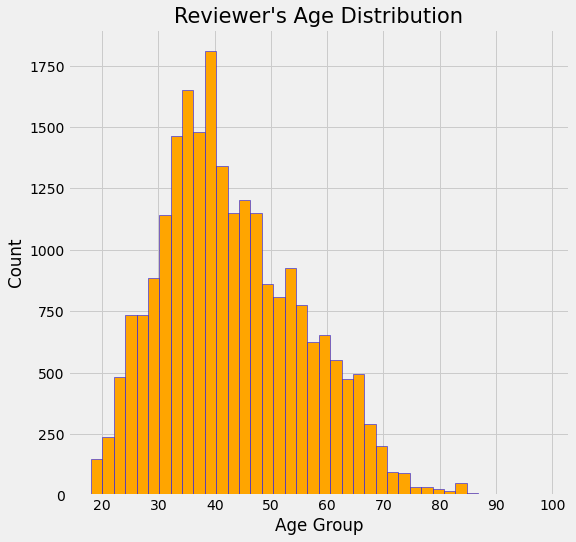

In [ ]:
plt.figure(figsize=(8, 8))
# df.Rating.value_counts()
df.Age.plot(kind='hist', bins=40, edgecolor='b', color='orange')
# plt.xticks(range(20, 100, 20))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Reviewer\'s Age Distribution', fontsize = 21)

In [ ]:
df['Division Name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

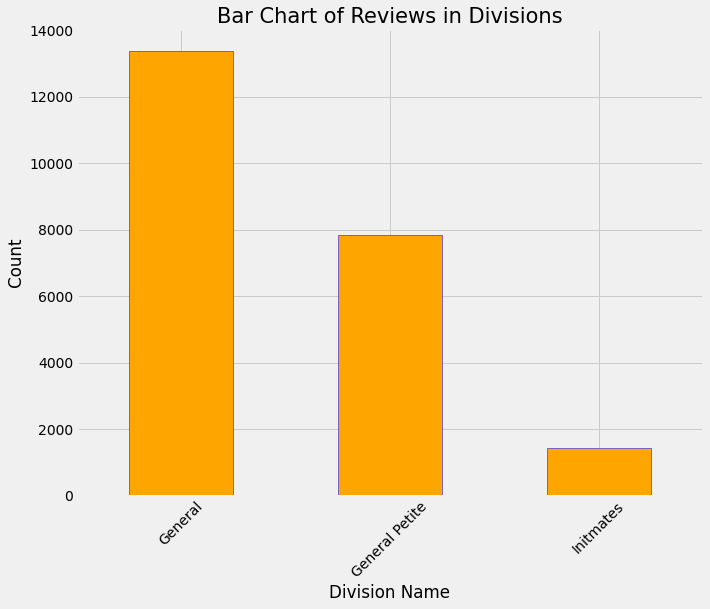

In [ ]:
plt.figure(figsize=(10, 8))
df.groupby('Division Name').count()['Review Text'].plot(kind = 'bar', color='orange', edgecolor='b')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Bar Chart of Reviews in Divisions', fontsize=21)
plt.show()

In [ ]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Reviews in Departments')

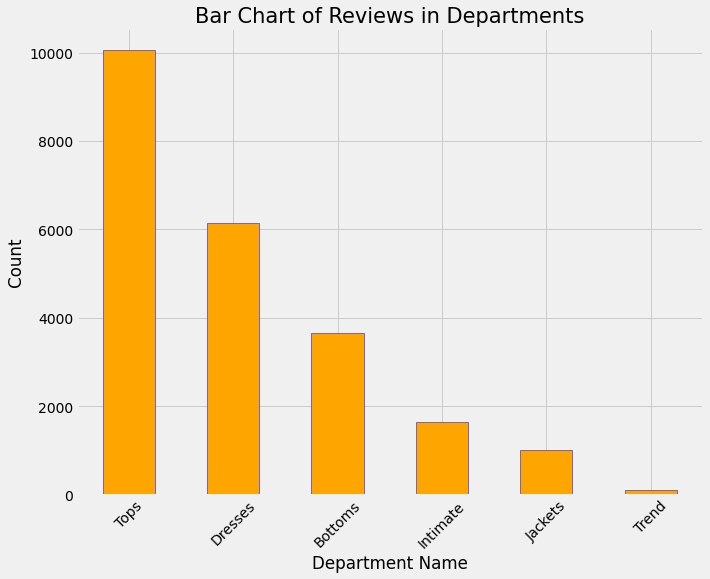

In [ ]:
plt.figure(figsize=(10, 8))
df.groupby('Department Name').count()['Review Text'].sort_values(ascending=False).plot(kind = 'bar', color='orange', edgecolor='b')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Bar Chart of Reviews in Departments', fontsize=21)


In [ ]:
df['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Reviews in Class')

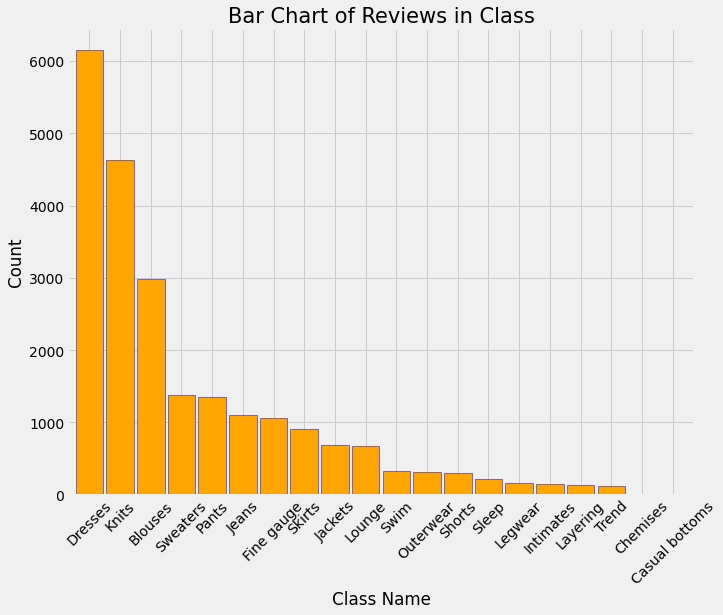

In [ ]:
plt.figure(figsize=(10, 8))
df.groupby('Class Name').count()['Review Text'].sort_values(ascending=False).plot(kind = 'bar', color='orange', edgecolor='b', width=0.9)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Bar Chart of Reviews in Class', fontsize=21)


In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

**CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).**

In [ ]:
CountVectorizer().fit(df['Review Text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
CountVectorizer().fit(df['Review Text']).transform(df['Review Text'])    # Shape --> 22641 x 14145

<22641x14145 sparse matrix of type '<class 'numpy.int64'>'
	with 966518 stored elements in Compressed Sparse Row format>

In [ ]:
CountVectorizer().fit(df['Review Text']).transform(df['Review Text']).sum(axis=0)               # Har Ek Column ka Sum
# CountVectorizer().fit(df['Review Text']).transform(df['Review Text']).sum(axis=0).shape         #(1, 14145)

matrix([[92,  2, 64, ...,  1,  1,  1]], dtype=int64)

In [ ]:
arr = CountVectorizer().fit(df['Review Text']).transform(df['Review Text']).toarray()

In [ ]:
arr.shape, arr.sum(axis=0)

((22641, 14145), array([92,  2, 64, ...,  1,  1,  1]))

In [ ]:
CountVectorizer().fit(df['Review Text']).vocabulary_.items()

dict_items([('absolutely', 583), ('wonderful', 13913), ('silky', 11133), ('and', 951), ('sexy', 10884), ('comfortable', 2846), ('love', 7393), ('this', 12570), ('dress', 4103), ('it', 6654), ('sooo', 11507), ('pretty', 9529), ('happened', 5832), ('to', 12710), ('find', 4941), ('in', 6364), ('store', 11846), ('glad', 5526), ('did', 3766), ('bc', 1478), ('never', 8260), ('would', 13974), ('have', 5873), ('ordered', 8608), ('online', 8537), ('petite', 9077), ('bought', 1896), ('am', 911), ('the', 12500), ('length', 7121), ('on', 8528), ('me', 7686), ('hits', 6047), ('just', 6798), ('little', 7273), ('below', 1588), ('knee', 6886), ('definitely', 3600), ('be', 1482), ('true', 12927), ('midi', 7812), ('someone', 11489), ('who', 13787), ('is', 6639), ('truly', 12929), ('had', 5768), ('such', 12037), ('high', 5998), ('hopes', 6117), ('for', 5191), ('really', 9915), ('wanted', 13574), ('work', 13937), ('initially', 6461), ('small', 11355), ('my', 8120), ('usual', 13348), ('size', 11193), ('but

In [ ]:
len(CountVectorizer().fit(df['Review Text']).vocabulary_.items())

14145

In [ ]:
dictionary_ = CountVectorizer().fit(df['Review Text']).vocabulary_
# dictionary_

In [ ]:
CountVectorizer().fit(df['Review Text']).transform(df['Review Text']).sum(axis=0)[0, 583]            # absolutely count: 811
# CountVectorizer().fit(df['Review Text']).transform(df['Review Text']).sum(axis=0)[0, index]   

811

In [ ]:
sum_ = CountVectorizer().fit(df['Review Text']).transform(df['Review Text']).sum(axis=0)
sum_
# sum_[0, 0]

matrix([[92,  2, 64, ...,  1,  1,  1]], dtype=int64)

In [ ]:
word_count = [(word, sum_[0, index]) for word, index in dictionary_.items()]

In [ ]:
# word_count

In [ ]:
word_count = sorted(word_count, key = lambda x :  x[1], reverse=True)
word_count[:5]                         # Top 5 Words

[('the', 76166), ('it', 49284), ('and', 49009), ('is', 30641), ('this', 25762)]

In [ ]:
def get_top_n_words(corpus, n=None):

  cv = CountVectorizer().fit(corpus)
  matrix = cv.transform(corpus)
  sum_ = matrix.sum(axis=0)
  word_count = [(word, sum_[0, index]) for word, index in cv.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [ ]:
common_words = get_top_n_words(df['Review Text'], n=20)

In [ ]:
common_words

[('the', 76166),
 ('it', 49284),
 ('and', 49009),
 ('is', 30641),
 ('this', 25762),
 ('to', 24583),
 ('in', 20723),
 ('but', 16556),
 ('on', 15328),
 ('for', 14000),
 ('of', 13429),
 ('with', 12803),
 ('was', 12221),
 ('so', 12023),
 ('my', 11028),
 ('dress', 10567),
 ('that', 10014),
 ('not', 9799),
 ('love', 8951),
 ('size', 8772)]

In [ ]:
df_ = pd.DataFrame(common_words, columns = ['Review Text', 'Count'])

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)

Text(0.5, 1.0, 'Top 20 Unigrams Distribution in Reviews (Before Removing Stop Words)')

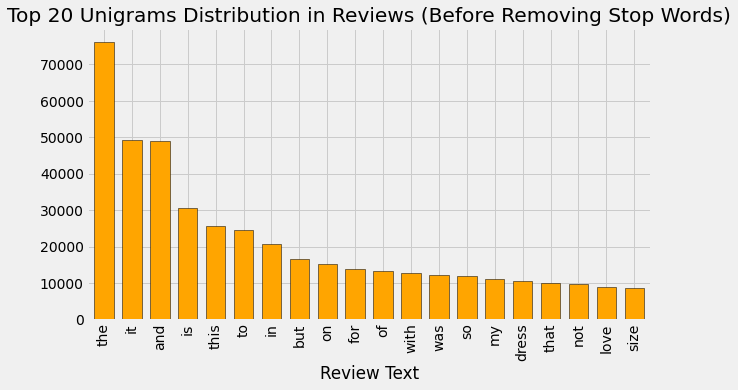

In [ ]:
plt.figure(figsize=(9, 5))
df_.groupby('Review Text').sum()['Count'].sort_values(ascending=False).plot(kind = 'bar', color='orange', edgecolor='black', width = 0.7)
plt.title('Top 20 Unigrams Distribution in Reviews (Before Removing Stop Words)')

In [ ]:
def get_top_n_words(corpus, n=None):

  cv = CountVectorizer(stop_words='english').fit(corpus)
  matrix = cv.transform(corpus)
  sum_ = matrix.sum(axis=0)
  word_count = [(word, sum_[0, index]) for word, index in cv.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [ ]:
common_words = get_top_n_words(df['Review Text'], n=20)

In [ ]:
df_ = pd.DataFrame(common_words, columns = ['Review Text', 'Count'])

Text(0.5, 1.0, 'Top 20 Unigrams Distribution in Reviews (After Removing Stop Words)')

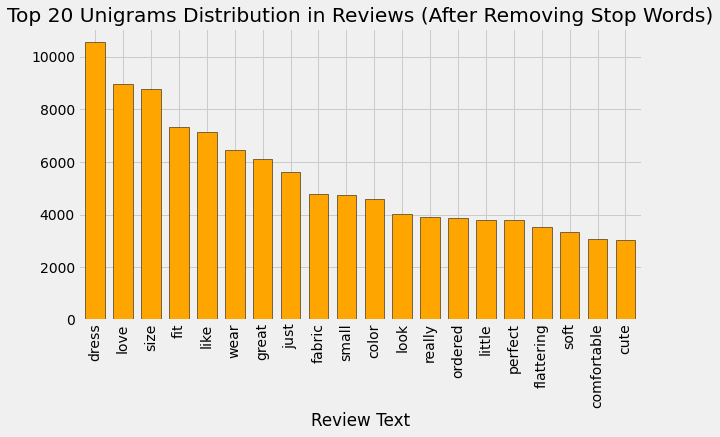

In [ ]:
plt.figure(figsize=(9, 5))
df_.groupby('Review Text').sum()['Count'].sort_values(ascending=False).plot(kind = 'bar', color='orange', edgecolor='black', width = 0.7)
plt.title('Top 20 Unigrams Distribution in Reviews (After Removing Stop Words)')

In [ ]:
def get_top_n_bigrams(corpus, n=None):

  cv = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
  matrix = cv.transform(corpus)
  sum_ = matrix.sum(axis=0)
  word_count = [(word, sum_[0, index]) for word, index in cv.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [ ]:
common_words = get_top_n_bigrams(df['Review Text'], n=20)

In [ ]:
df_ = pd.DataFrame(common_words, columns=['Review Text', 'Count'])

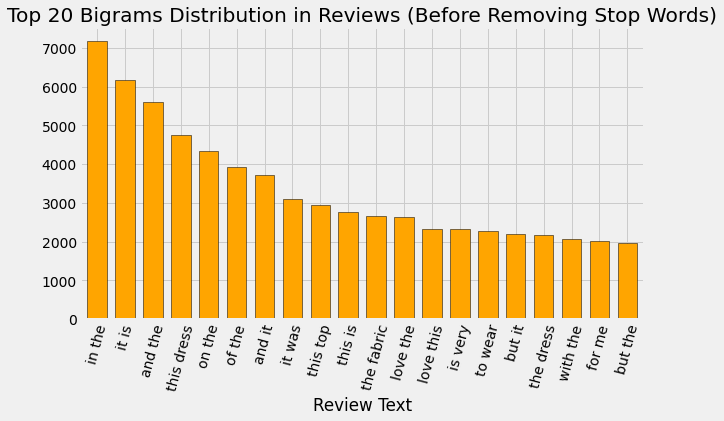

In [ ]:
plt.figure(figsize = (9, 5))
df_.groupby('Review Text').sum()['Count'].sort_values(ascending = False).plot(kind = 'bar', color = 'orange', edgecolor='black', width = 0.7)
plt.xticks(rotation=75)
plt.title('Top 20 Bigrams Distribution in Reviews (Before Removing Stop Words)')
plt.show()

In [ ]:
def get_top_n_bigrams(corpus, n=None):

  cv = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
  matrix = cv.transform(corpus)
  sum_ = matrix.sum(axis=0)
  word_count = [(word, sum_[0, index]) for word, index in cv.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [ ]:
common_words = get_top_n_bigrams(df['Review Text'], n=20)
df_ = pd.DataFrame(common_words, columns=['Review Text', 'Count'])

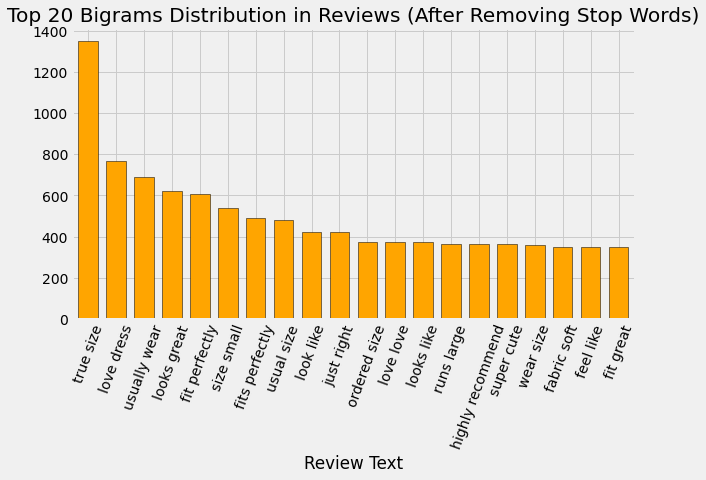

In [ ]:
plt.figure(figsize = (9, 5))
df_.groupby('Review Text').sum()['Count'].sort_values(ascending = False).plot(kind = 'bar', color = 'orange', edgecolor='black', width = 0.7)
plt.xticks(rotation=70)
plt.title('Top 20 Bigrams Distribution in Reviews (After Removing Stop Words)')
plt.show()

In [ ]:
def get_top_n_trigrams(corpus, n=None):

  cv = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
  matrix = cv.transform(corpus)
  sum_ = matrix.sum(axis=0)
  word_count = [(word, sum_[0, index]) for word, index in cv.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [ ]:
common_words = get_top_n_trigrams(df['Review Text'], n=20)
df_ = pd.DataFrame(common_words, columns=['Review Text', 'Count'])

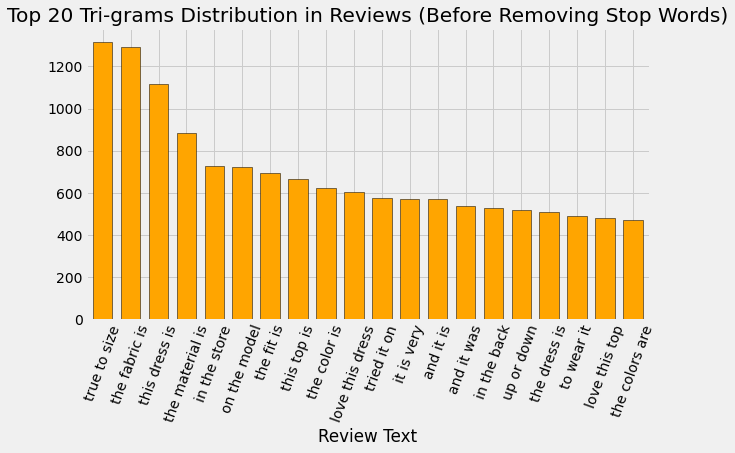

In [ ]:
plt.figure(figsize = (9, 5))
df_.groupby('Review Text').sum()['Count'].sort_values(ascending = False).plot(kind = 'bar', color = 'orange', edgecolor='black', width = 0.7)
plt.xticks(rotation=70)
plt.title('Top 20 Tri-grams Distribution in Reviews (Before Removing Stop Words)')
plt.show()

In [ ]:
def get_top_n_trigrams(corpus, n=None):

  cv = CountVectorizer(ngram_range=(3, 3), stop_words= 'english').fit(corpus)
  matrix = cv.transform(corpus)
  sum_ = matrix.sum(axis=0)
  word_count = [(word, sum_[0, index]) for word, index in cv.vocabulary_.items()]
  word_count = sorted(word_count, key = lambda x : x[1], reverse=True)
  return word_count[:n]

In [ ]:
common_words = get_top_n_trigrams(df['Review Text'], n=20)
df_ = pd.DataFrame(common_words, columns=['Review Text', 'Count'])

Text(0.5, 1.0, 'Top 20 Tri-grams Distribution in Reviews (After Removing Stop Words)')

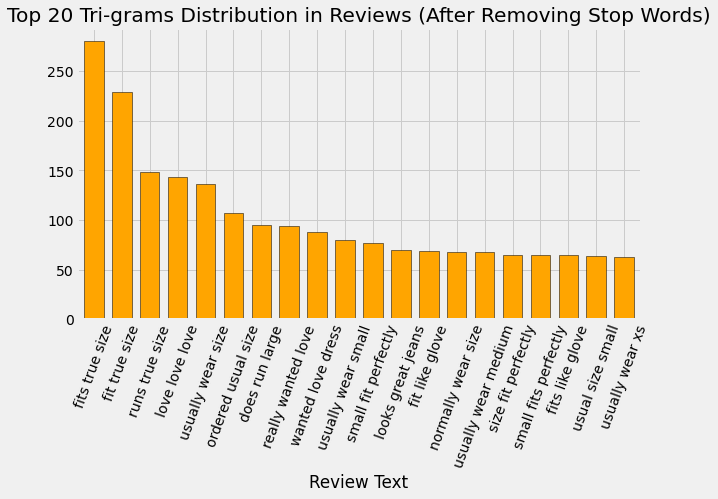

In [ ]:
plt.figure(figsize = (9, 5))
df_.groupby('Review Text').sum()['Count'].sort_values(ascending = False).plot(kind = 'bar', color = 'orange', edgecolor='black', width = 0.7)
plt.xticks(rotation=70)
plt.title('Top 20 Tri-grams Distribution in Reviews (After Removing Stop Words)')

Part-Of-Speech Tagging (POS) is a process of assigning parts of speech to each word, such as noun, verb, adjective, etc

In [ ]:
TextBlob(str(df['Review Text']))

TextBlob("0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22641, dtype: object")

In [ ]:
blob = TextBlob(str(df['Review Text']))

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('and', 'CC'),
 ('sexy', 'NN'),
 ('and', 'CC'),
 ('comf', 'NN'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('i', 'JJ'),
 ('happene', 'NN'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('reall', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('fun', 'NN'),
 ('fl', 'NN'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('th', 'VB'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('happy', 'JJ'),
 ('to', 'TO'),
 ('snag', 'VB'),
 ('this', 'DT'),
 ('d

In [ ]:
pd.DataFrame(blob.tags, columns=['Word', 'POS'])

,Word,POS
0,0,CD
1,Absolutely,RB
2,wonderful,JJ
3,silky,NN
4,and,CC
...,...,...
106,Text,NNP
107,Length,NNP
108,22641,CD
109,dtype,NN


In [ ]:
pd.DataFrame(blob.tags, columns=['Word', 'POS']).POS.value_counts()

NN     25
DT     15
JJ     12
CD     11
PRP     8
RB      6
VBZ     5
IN      5
CC      4
NNP     4
VBD     4
VBP     4
TO      3
VB      2
NNS     2
PDT     1
Name: POS, dtype: int64

Text(0.5, 1.0, 'Part-of-Speech tagging for Review corpus')

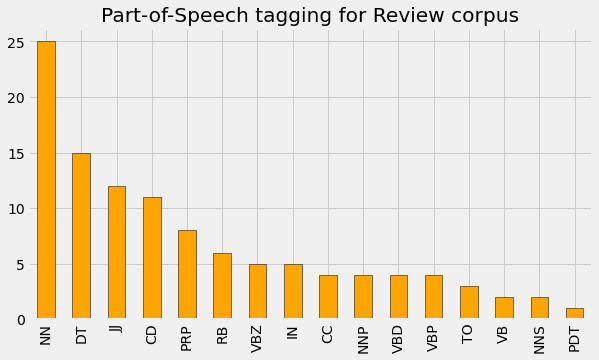

In [ ]:
pd.DataFrame(blob.tags, columns=['Word', 'POS']).POS.value_counts().plot(kind = 'bar', color='orange', edgecolor='black', figsize = (9, 5))
plt.title('Part-of-Speech tagging for Review corpus')

 ----

**What do the departments tell about Sentiment polarity?**

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**  
Read here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [ ]:
y0 = df.loc[df['Department Name'] == 'Tops'].polarity
y1 = df.loc[df['Department Name'] == 'Dresses'].polarity
y2 = df.loc[df['Department Name'] == 'Bottoms'].polarity
y3 = df.loc[df['Department Name'] == 'Intimate'].polarity
y4 = df.loc[df['Department Name'] == 'Jackets'].polarity
y5 = df.loc[df['Department Name'] == 'Trend'].polarity

trace0 = go.Box(
    y=y0,
    name = 'Tops',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Dresses',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bottoms',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Intimate',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Jackets',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Trend',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Department Name",
    width = 900,
    height = 500
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Department Name")


**What do the departments tell about rating?**


In [ ]:
y0 = df.loc[df['Department Name'] == 'Tops'].Rating
y1 = df.loc[df['Department Name'] == 'Dresses'].Rating
y2 = df.loc[df['Department Name'] == 'Bottoms'].Rating
y3 = df.loc[df['Department Name'] == 'Intimate'].Rating
y4 = df.loc[df['Department Name'] == 'Jackets'].Rating
y5 = df.loc[df['Department Name'] == 'Trend'].Rating

trace0 = go.Box(
    y=y0,
    name = 'Tops',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Dresses',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bottoms',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Intimate',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Jackets',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Trend',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Department Name",
    width = 900,
    height = 500
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Rating Boxplot of Department Name")

In [ ]:
y1.value_counts()

5    3267
4    1367
3     830
2     459
1     222
Name: Rating, dtype: int64

In [ ]:
 y4.value_counts()

5    609
4    195
3     90
2     60
1     48
Name: Rating, dtype: int64

In [ ]:
y5.value_counts()

5    52
4    26
3    19
2    11
1    10
Name: Rating, dtype: int64